## Seasonal naive predictor for forecasting electricity consumption ##
- In this notebook we calculate predictions for future consumption using seasonal naive predictor, which results we use as the baseline for benchmarking our future solution.

In [12]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions

In [ ]:
#Read dataset
path = "household_power_consumption.txt"
df = functions.load_data(path)

#Preprocess dataset and convert to hourly
df_hourly = functions.preprocess_data(df).reset_index()
df_hourly.head()

,datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-17 00:00:00,1.882467,0.102433,8.126667,240.961833,0.0,0.466667,0.000000
1,2006-12-17 01:00:00,3.349400,0.136933,14.246667,240.448333,0.0,25.233333,0.000000
2,2006-12-17 02:00:00,1.587267,0.078233,6.870000,245.818667,0.0,0.566667,0.000000
3,2006-12-17 03:00:00,1.662200,0.079533,7.206667,244.513500,0.0,0.766667,0.000000
4,2006-12-17 04:00:00,2.215767,0.093467,9.333333,243.855500,0.0,0.566667,8.883333


Next up, we calculate predictions for future consumption using seasonal naive predictor. Let the season length $h=7*24=168$ and prediction horizon $T=168$. As the season length $h$ and prediction horizon $T$ are equal, we can use previous observation for each prediction. In practice, we calculate hourly forecasts for one week.

In [ ]:

#Season length
h = 24 * 7

#Calculate seasonal naive predictor values, for whole dataset
df_hourly["prediction"] = df_hourly["Global_active_power"].shift(h)

#Extract last 365 days for evaluation (our test data)
df_test = df_hourly.iloc[-365*24:].reset_index(drop=True)

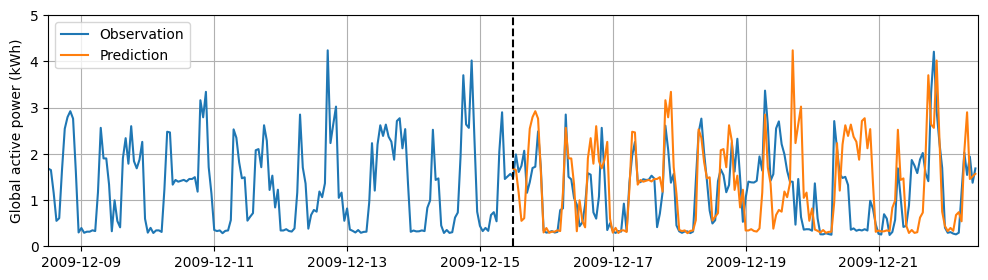

In [45]:
#Determine start and end of the observations, before predictions
start = 300
end = start + 7 * 24
#Prediction horizon
T = 7 * 24

plt.figure(figsize=(12,3))
plt.plot(df_test["datetime"].iloc[start:(end+T)],df_test["Global_active_power"].iloc[start:(end+T)],label="Observation")
plt.plot(df_test["datetime"].iloc[end:(end+T)],df_test["prediction"].iloc[end:(end+T)],label="Prediction")
plt.xlim(df_test["datetime"].iloc[start],df_test["datetime"].iloc[end+T])
plt.vlines(df_test["datetime"].iloc[end],0,5,linestyles="dashed",colors="black")
plt.ylabel("Global active power (kWh)")
plt.ylim(0,5)
plt.legend()
plt.grid()

Next, we calculate Root-mean-squared errors (RMSE) and mean arctangent absolute percentage errors (MAAPE).

In [74]:
from sklearn.metrics import root_mean_squared_error

rmse_values = []
maape_values = []
for i in range(0,len(df_test)-T):
    rmse_values.append(root_mean_squared_error(df_test["Global_active_power"].iloc[i:(i+T)],df_test["prediction"].iloc[i:(i+T)]))
    maape_values.append(functions.mean_arctangent_absolute_percentage_error(df_test["Global_active_power"].iloc[i:(i+T)],df_test["prediction"].iloc[i:(i+T)]))
print(f"Average RMSE {np.round(np.mean(rmse_values),2)} kWh")
print(f"Average MAAPE {np.round(np.mean(maape_values),2)} %")

Average RMSE 0.81 kWh
Average MAAPE 0.44 %


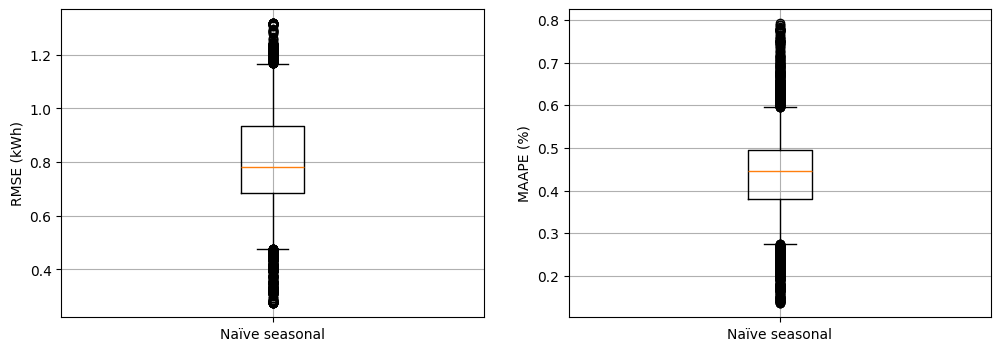

In [82]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.boxplot(rmse_values,labels=["Naïve seasonal"],whis=(5,95))
plt.ylabel("RMSE (kWh)")
plt.grid()
plt.subplot(1,2,2)
plt.boxplot(maape_values,labels=["Naïve seasonal"],whis=(5,95))
plt.ylabel("MAAPE (%)")
plt.grid()
plt.show()